In [1]:
import torch
from efficientnet_pytorch import EfficientNet

def test_model_loading():
    """
    Проверяет, можно ли загрузить предварительно обученную модель EfficientNet.
    Это подтверждает, что библиотека установлена правильно и может скачивать веса.
    """
    print("--- Запуск теста EfficientNet-PyTorch ---")
    try:
        # Пытаемся загрузить самую маленькую модель (efficientnet-b0) с весами ImageNet
        print("Загрузка модели 'efficientnet-b0' с предварительно обученными весами...")
        model = EfficientNet.from_pretrained('efficientnet-b0')
        
        # Переводим модель в режим оценки
        model.eval()
        
        print("\n[SUCCESS] Модель 'efficientnet-b0' успешно загружена!")
        print("Информация о модели:")
        # Выведем краткую информацию о структуре модели, чтобы убедиться, что это объект модели
        print(model._blocks[0]) # Печатаем первый блок для примера
        
        # Создадим случайный тензор, чтобы проверить прямой проход (forward pass)
        dummy_input = torch.randn(1, 3, 224, 224)
        print(f"\nТестирование прямого прохода с тензором размера: {dummy_input.shape}")
        with torch.no_grad():
            output = model(dummy_input)
        print(f"Размер выходного тензора: {output.shape}") # Должен быть [1, 1000] для ImageNet
        print("[SUCCESS] Прямой проход выполнен успешно.")

    except Exception as e:
        print(f"\n[FAILURE] Произошла ошибка во время теста: {e}")
        
    print("\n--- Тест EfficientNet-PyTorch завершен ---")

if __name__ == "__main__":
    test_model_loading()

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- Запуск теста EfficientNet-PyTorch ---
Загрузка модели 'efficientnet-b0' с предварительно обученными весами...
Loaded pretrained weights for efficientnet-b0

[SUCCESS] Модель 'efficientnet-b0' успешно загружена!
Информация о модели:
MBConvBlock(
  (_depthwise_conv): Conv2dStaticSamePadding(
    32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
    (static_padding): ZeroPad2d((1, 1, 1, 1))
  )
  (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_se_reduce): Conv2dStaticSamePadding(
    32, 8, kernel_size=(1, 1), stride=(1, 1)
    (static_padding): Identity()
  )
  (_se_expand): Conv2dStaticSamePadding(
    8, 32, kernel_size=(1, 1), stride=(1, 1)
    (static_padding): Identity()
  )
  (_project_conv): Conv2dStaticSamePadding(
    32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    (static_padding): Identity()
  )
  (_bn2): BatchNorm2d(16, eps=0.001, momentum=0.010000000000000009, affine=True, track_running

In [2]:
from efficientnet_pytorch import EfficientNet

# Эта команда теперь будет работать без проблем
model = EfficientNet.from_pretrained('efficientnet-b0')
print("Модель готова к использованию!")

Loaded pretrained weights for efficientnet-b0
Модель готова к использованию!


In [3]:
ls -l /root/.cache/torch/hub/checkpoints/

total 20888
-rw------- 1 root root 21388428 Jun 19 15:22 efficientnet-b0-355c32eb.pth


In [9]:
print("Скачиваем тестовое изображение...")
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/800px-Grosser_Panda.JPG -O panda.jpg

print("\nСкачиваем файл с метками классов...")
!wget https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt -O labels_map.txt

print("\nФайлы успешно загружены в текущую директорию!")

Скачиваем тестовое изображение...
--2025-06-19 16:21:14--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/800px-Grosser_Panda.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 185.15.59.240, 2a02:ec80:300:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|185.15.59.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135355 (132K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 132.18K  --.-KB/s    in 0.09s   

2025-06-19 16:21:14 (1.42 MB/s) - ‘panda.jpg’ saved [135355/135355]


Скачиваем файл с метками классов...
--2025-06-19 16:21:14--  https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP req

Используемое устройство: cuda

Загрузка модели EfficientNet-b0...
Loaded pretrained weights for efficientnet-b0
Загрузка меток классов ImageNet...

Открытие и обработка изображения 'panda.jpg'...


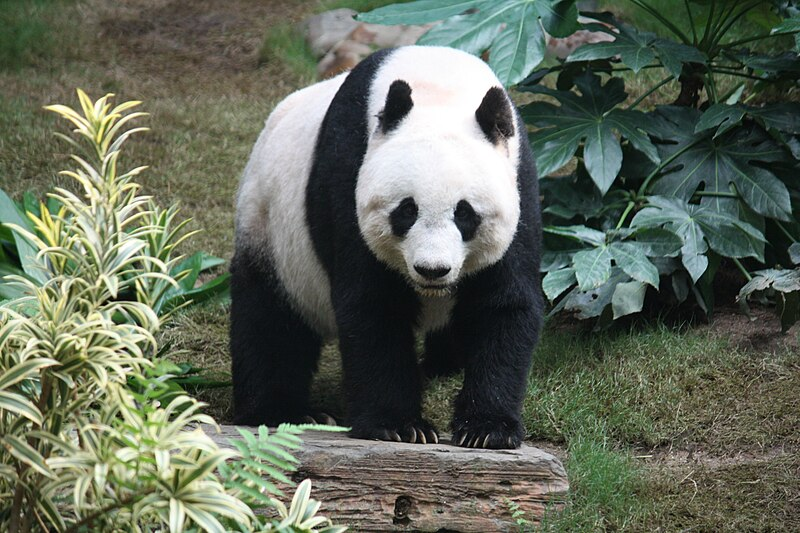


Выполнение классификации...

--- Результаты предсказания ---
1. giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           : 87.59%
2. brown bear, bruin, Ursus arctos                                             : 0.68%
3. lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens         : 0.40%
4. badger                                                                      : 0.36%
5. ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 : 0.33%


In [9]:
import json
import torch
from PIL import Image
from torchvision import transforms
from efficientnet_pytorch import EfficientNet

# --- 1. Загрузка модели и меток ---
# Проверяем доступность GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используемое устройство: {device}\n")

print("Загрузка модели EfficientNet-b0...")
# Загружаем модель и сразу переносим ее на GPU (если доступен)
model = EfficientNet.from_pretrained('efficientnet-b0')
model.to(device)
model.eval() # Переводим модель в режим оценки

print("Загрузка меток классов ImageNet...")
with open('labels_map.txt') as f:
    labels_map = json.load(f)

# --- 2. Подготовка изображения ---
# Определяем стандартные трансформации для ImageNet
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

print("\nОткрытие и обработка изображения 'panda.jpg'...")
input_image = Image.open('panda.jpg')
# Отобразим изображение прямо в ноутбуке
display(input_image)

input_tensor = preprocess(input_image)
# Модель ожидает "батч" изображений, поэтому добавляем еще одну размерность
input_batch = input_tensor.unsqueeze(0) 

# Переносим тензор с данными на то же устройство, что и модель
input_batch = input_batch.to(device)

# --- 3. Классификация и вывод результата ---
print("\nВыполнение классификации...")
with torch.no_grad():
    output = model(input_batch)

# Преобразуем выходные "сырые" значения (логиты) в вероятности
probabilities = torch.nn.functional.softmax(output[0], dim=0)

# --- 4. Вывод топ-5 предсказаний ---
print("\n--- Результаты предсказания ---")
top5_prob, top5_catid = torch.topk(probabilities, 5)

for i in range(top5_prob.size(0)):
    # .item() извлекает значение из тензора
    # .cpu() необходимо, если тензор был на GPU
    category_id = top5_catid[i].item()
    probability = top5_prob[i].item() * 100
    category_name = labels_map[str(category_id)]
    print(f"{i+1}. {category_name:<75} : {probability:.2f}%")

In [10]:
from PIL import Image
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
import json

# ==============================================================================
# ШАГ 1: Загрузка модели EfficientNet и меток классов
# ==============================================================================
# Этот код почти идентичен тому, что мы использовали для панды

print("Загрузка модели EfficientNet-b0...")
# Загружаем модель и сразу переносим ее на GPU (если доступен)
effnet_model = EfficientNet.from_pretrained('efficientnet-b0')
effnet_model.to(device) # device был определен в предыдущей ячейке
effnet_model.eval() # Переводим модель в режим оценки

print("Загрузка меток классов ImageNet...")
# Убедитесь, что файл labels_map.txt находится в основной директории /app
try:
    with open('labels_map.txt') as f:
        labels_map = json.load(f)
except FileNotFoundError:
    print("Ошибка: файл labels_map.txt не найден. Выполните ячейку для его скачивания.")
    # Если файла нет, можно скачать его снова
    # !wget https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt -O labels_map.txt
    # with open('labels_map.txt') as f:
    #     labels_map = json.load(f)


# ==============================================================================
# ШАГ 2: Подготовка ОРИГИНАЛЬНОГО изображения для EfficientNet
# ==============================================================================

# Трансформации для EfficientNet (стандартизация под ImageNet)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

print("\nПодготовка оригинального изображения для классификации...")
# ВАЖНО: Мы используем переменную 'image_rgb' из предыдущей ячейки.
# Она хранит оригинальное изображение в виде NumPy массива.
# Преобразуем его в формат PIL Image, который ожидает 'preprocess'.
pil_image = Image.fromarray(image_rgb)

# Применяем трансформации
input_tensor = preprocess(pil_image)
# Добавляем "батч" размерность (модель ожидает пачку изображений)
input_batch = input_tensor.unsqueeze(0) 

# Переносим тензор на то же устройство, что и модель (GPU)
input_batch = input_batch.to(device)


# ==============================================================================
# ШАГ 3: Запуск классификации и вывод результата
# ==============================================================================

print("Выполнение классификации...")
with torch.no_grad():
    output = effnet_model(input_batch)

# Преобразуем выходные значения в вероятности
probabilities = torch.nn.functional.softmax(output[0], dim=0)

print("\n--- Результаты классификации для всей сцены ---")
# Получаем топ-5 предсказаний
top5_prob, top5_catid = torch.topk(probabilities, 5)

for i in range(top5_prob.size(0)):
    category_id = top5_catid[i].item()
    probability = top5_prob[i].item() * 100
    category_name = labels_map[str(category_id)]
    print(f"{i+1}. {category_name:<40} : {probability:.2f}%")

Загрузка модели EfficientNet-b0...
Loaded pretrained weights for efficientnet-b0
Загрузка меток классов ImageNet...

Подготовка оригинального изображения для классификации...
Выполнение классификации...

--- Результаты классификации для всей сцены ---
1. ski                                      : 35.10%
2. snowmobile                               : 7.15%
3. dogsled, dog sled, dog sleigh            : 6.19%
4. shovel                                   : 5.46%
5. ski mask                                 : 2.34%
